#Data Loading

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
data = pd.read_csv("/Data Analyst Assessment - dataset 1.csv")
data.head()

,Month,Financial Year,Chain,Suburb,State,Postcode,Country,Manager,Category,Buyer,Sales
0,1/1/2016,2015/16,Fashions Direct,Chatswood,NSW,2067,Australia,Jeremy Garcia,Home,Richard Carr,479.02
1,1/1/2016,2015/16,Fashions Direct,Chatswood,NSW,2067,Australia,Jeremy Garcia,Juniors,Chester George,149.95
2,1/1/2016,2015/16,Fashions Direct,Chatswood,NSW,2067,Australia,Jeremy Garcia,Mens,Bruce Curran,14.00
3,1/1/2016,2015/16,Fashions Direct,Chatswood,NSW,2067,Australia,Jeremy Garcia,Juniors,Chester George,12.00
4,1/1/2016,2015/16,Fashions Direct,Chatswood,NSW,2067,Australia,Jeremy Garcia,Womens,Amy Buchanan,46.94


In [ ]:
data.shape

(72425, 11)

In [ ]:
data["Country"].value_counts()
#thus we can drop this column

Australia    72425
Name: Country, dtype: int64

In [ ]:
data["Suburb"].value_counts()

Campbelltown     1196
Chadstone        1183
Albany           1154
Underwood        1125
Indooroopilly    1111
                 ... 
Esperance         513
Yeppoon           493
Atherton          384
Hastings          363
Horsham           129
Name: Suburb, Length: 97, dtype: int64

In [ ]:
data.isnull().sum()

Month             0
Financial Year    0
Chain             0
Suburb            0
State             0
Postcode          0
Country           0
Manager           0
Category          0
Buyer             0
Sales             0
dtype: int64

In [ ]:
data.corr()
#thus we can neglect this variable.

,Postcode,Sales
Postcode,1.000000,-0.092038
Sales,-0.092038,1.000000


#Linear Regression Model

In [ ]:
x = data[["Financial Year","Chain","State","Manager","Category","Buyer"]]
x = pd.get_dummies(data=x, drop_first=True)
x.head()



,Financial Year_2016/17,Financial Year_2017/18,Chain_Next Look,State_NSW,State_NT,State_QLD,State_SA,State_TAS,State_VIC,State_WA,Manager_Amber Ward,Manager_Brian Hubbard,Manager_Caroline Tucker,Manager_Claire Bridges,Manager_George Chester,Manager_Jeremy Garcia,Manager_Jerry Fulton,Manager_John Gardner,Manager_John Harper,Manager_Lillian Pruitt,Manager_Michael Carney,Manager_Miles Hammond,Manager_Owen Pierce,Manager_Rachael Long,Manager_Ray Watson,Manager_Ricky Wilkinson,Manager_Shellie Thomas,Manager_Simone Prior,Manager_Terri Wright,Manager_Tom McKenzie,Category_Groceries,Category_Home,Category_Hosiery,Category_Intimate,Category_Juniors,Category_Kids,Category_Mens,Category_Shoes,Category_Womens,Buyer_Bruce Curran,Buyer_Chester George,Buyer_Chris Monroe,Buyer_Elizabeth Gentry,Buyer_Ella Hickman,Buyer_Howard Wright,Buyer_Maggie Mayer,Buyer_Richard Carr,Buyer_Sara Ferrell
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
y = data[["Sales"]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101) #takin 60-40 spilt
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((54318, 48), (18107, 48), (54318, 1), (18107, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(Regressor.intercept_)

[-6.64311813e+15]


In [38]:
print(Regressor.coef_)


[[ 9.09718323e+01 -1.44818755e+02 -6.11771791e+02  5.11793719e+02
   9.72381305e+15  7.07579539e+15  4.79075617e+15 -3.42137342e+15
   2.44227517e+15 -5.23943361e+15 -2.28503922e+15  2.34848100e+15
  -2.28503922e+15  4.79075617e+15  4.79075617e+15  4.79075617e+15
   2.34848100e+15  4.79075617e+15  1.00301898e+16  4.79075617e+15
  -4.93305688e+15  1.00301898e+16  2.34848100e+15  2.34848100e+15
   3.89772050e+01 -2.28503922e+15 -2.28503922e+15  8.21212959e+15
  -2.28503922e+15  1.00301898e+16  7.46994971e+15  8.82929697e+15
   7.59687101e+14 -1.37717850e+14  1.88481554e+14  2.14345104e+15
   3.09641658e+15 -3.08809261e+15  1.85236196e+15 -1.24405462e+15
   1.66388040e+15 -5.61758775e+15 -2.91089078e+14  1.09267486e+15
   4.94045457e+15  1.85236196e+15 -6.97693501e+15  1.99007981e+15]]


In [18]:
prediction = Regressor.predict(x_test)
prediction

array([[ 916.],
       [ 240.],
       [1511.],
       ...,
       [ 889.],
       [1489.],
       [ 732.]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


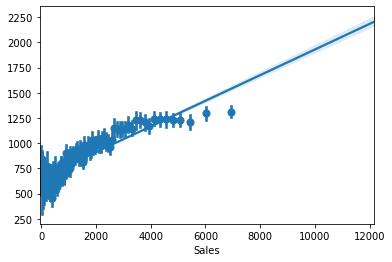

In [28]:
sns.regplot(y_test,prediction,x_bins=250)

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('RSquared value:', Regressor.score(x_test, prediction))

Mean Absolute Error: 761.8398122273154
Mean Squared Error: 1289795.2748105708
RSquared value: 1.0
